In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['cell_images']


In [35]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

In [36]:
parasitized_data = os.listdir('../input/cell_images/cell_images/Parasitized/')
print(parasitized_data[:10]) #the output we get are the .png files

uninfected_data = os.listdir('../input/cell_images/cell_images/Uninfected/')
print('\n')
print(uninfected_data[:10])

['C99P60ThinF_IMG_20150918_141001_cell_93.png', 'C99P60ThinF_IMG_20150918_141001_cell_133.png', 'C101P62ThinF_IMG_20150918_151942_cell_60.png', 'C162P123ThinF_IMG_20151116_102655_cell_163.png', 'C52P13thinF_IMG_20150725_124830_cell_174.png', 'C136P97ThinF_IMG_20151005_141803_cell_121.png', 'C48P9thinF_IMG_20150721_161243_cell_157.png', 'C137P98ThinF_IMG_20151005_163901_cell_80.png', 'C51AP12thinF_IMG_20150724_155046_cell_94.png', 'C51AP12thinF_IMG_20150724_161126_cell_118.png']


['C203ThinF_IMG_20151029_102123_cell_51.png', 'C238NThinF_IMG_20151207_114038_cell_84.png', 'C119P80ThinF_IMG_20151002_124304_cell_112.png', 'C39P4thinF_original_IMG_20150622_111723_cell_33.png', 'C101P62ThinF_IMG_20150918_151149_cell_63.png', 'C180P141NThinF_IMG_20151201_165601_cell_115.png', 'C95P56ThinF_IMG_20150821_171603_cell_75.png', 'C236ThinF_IMG_20151127_102516_cell_177.png', 'C125P86ThinF_IMG_20151004_102053_cell_83.png', 'C49P10thinF_IMG_20150724_102330_cell_160.png']


**DATA VISUALIZATION**[](http://)

**1. PARASITIZED DATA**

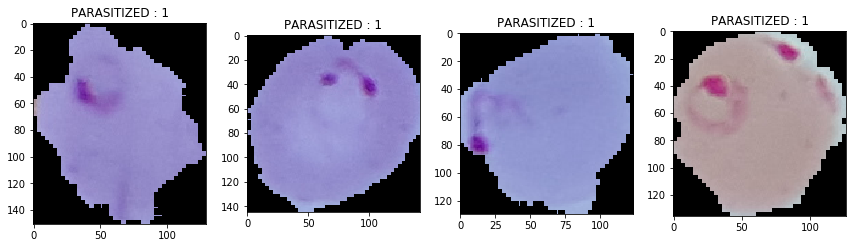

In [37]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('../input/cell_images/cell_images/Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

**2. UNINFECTTED DATA**

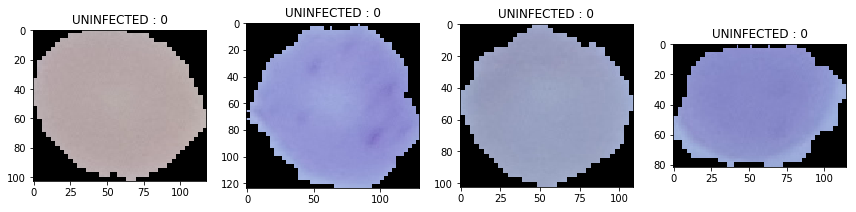

In [38]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('../input/cell_images/cell_images/Uninfected' + "/" + uninfected_data[i+1])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

**One can clearly see the difference between the infected and uninfected. You can observe a small clot inside the cellular image for infected while for the uninfected the cellular image is clean without any clots.**

In [39]:
data = []
labels = []
for img in parasitized_data:
    try:
        img_read = plt.imread('../input/cell_images/cell_images/Parasitized/' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread('../input/cell_images/cell_images/Uninfected' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

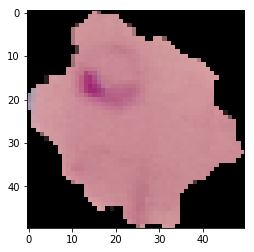

In [40]:
plt.imshow(data[0])
plt.show()

In [41]:
image_data = np.array(data)
labels = np.array(labels)

In [42]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)

In [44]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [45]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (22046, 50, 50, 3)
SHAPE OF TESTING IMAGE DATA : (5512, 50, 50, 3)
SHAPE OF TRAINING LABELS : (22046, 2)
SHAPE OF TESTING LABELS : (5512, 2)


* **BUILDING THE CNN MODEL (without data augmentation)**

In [46]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers

In [47]:
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

In [48]:
#instantiate the model
height = 50
width = 50
classes = 2
channels = 3
model = CNNbuild(height = height, width = width, classes = classes, channels = channels)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_9 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 11, 11, 32)        128       
__________

In [49]:
#compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [50]:
#fit the model onto the dataset
h = model.fit(x_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
22046/22046 [==============================] - 6s 289us/step - loss: 0.5497 - acc: 0.7706
Epoch 2/20
22046/22046 [==============================] - 5s 217us/step - loss: 0.2190 - acc: 0.9194
Epoch 3/20
22046/22046 [==============================] - 5s 229us/step - loss: 0.1897 - acc: 0.9326
Epoch 4/20
22046/22046 [==============================] - 5s 226us/step - loss: 0.1729 - acc: 0.9408
Epoch 5/20
22046/22046 [==============================] - 5s 238us/step - loss: 0.1680 - acc: 0.9435
Epoch 6/20
22046/22046 [==============================] - 5s 227us/step - loss: 0.1632 - acc: 0.9450
Epoch 7/20
22046/22046 [==============================] - 5s 217us/step - loss: 0.1562 - acc: 0.9480
Epoch 8/20
22046/22046 [==============================] - 5s 229us/step - loss: 0.1590 - acc: 0.9472
Epoch 9/20
22046/22046 [==============================] - 5s 219us/step - loss: 0.1482 - acc: 0.9510
Epoch 10/20
22046/22046 [==============================] - 5s 228us/step - loss: 0.1478 - a

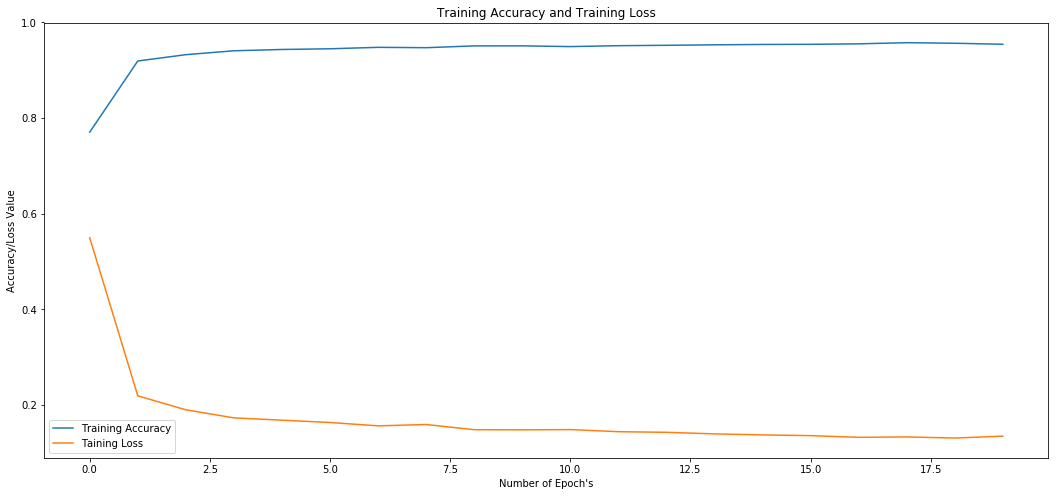

In [51]:
plt.figure(figsize = (18,8))
plt.plot(range(20), h.history['acc'], label = 'Training Accuracy')
plt.plot(range(20), h.history['loss'], label = 'Taining Loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")

# ax2.plot(range(20), h.history['loss'], label = 'Training Loss')
# ax2.plot(range(20), h.history['val_loss'], label = 'Validation Loss')
# #ax2.set_xticks(np.arange(0, 31, 5))
# ax2.set_xlabel("Number of Epoch's")
# ax2.set_ylabel('Loss Value')
# ax2.set_title('Training Loss vs Validation Loss')
# ax2.legend(loc = "best")

In [52]:
#evaluate the model on test data
predictions = model.evaluate(x_test, y_test)

5512/5512 [==============================] - 1s 120us/step


In [53]:
print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')

LOSS : 0.1264071309363202
ACCURACY : 0.9570029027576198


**The performance of the model on the test data seems to fairly good with 95.77% accuracy.**

**WITH DATA AUGMENTATION**

In [54]:
from keras.preprocessing.image import ImageDataGenerator

In [55]:
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                  horizontal_flip = True,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  fill_mode = 'nearest',
                                  zoom_range = 0.3,
                                  rotation_range = 30)
val_datagen = ImageDataGenerator(rescale = 1/255.)

train_generator = train_datagen.flow(x_train, y_train, batch_size = 64, shuffle = False)
val_generator = val_datagen.flow(x_test, y_test, batch_size = 64, shuffle = False)

In [56]:
#calling the same model as above
model_aug = CNNbuild(height = height, width = width, classes = classes, channels = channels)

In [57]:
#compile the model
optim = optimizers.Adam(lr = 0.001, decay = 0.001 / 64)
model_aug.compile(loss = 'categorical_crossentropy', optimizer = optim, metrics = ['accuracy'])

In [58]:
#fit the model on the augmented dataset
h_aug = model_aug.fit_generator(train_generator, steps_per_epoch = len(x_train) // 64, epochs = 50)

Epoch 1/50
344/344 [==============================] - 17s 50ms/step - loss: 0.7987 - acc: 0.6198
Epoch 2/50
344/344 [==============================] - 16s 46ms/step - loss: 0.5757 - acc: 0.7114
Epoch 3/50
344/344 [==============================] - 16s 48ms/step - loss: 0.4163 - acc: 0.8141
Epoch 4/50
344/344 [==============================] - 16s 46ms/step - loss: 0.3444 - acc: 0.8616
Epoch 5/50
344/344 [==============================] - 16s 48ms/step - loss: 0.3189 - acc: 0.8763
Epoch 6/50
344/344 [==============================] - 16s 45ms/step - loss: 0.3009 - acc: 0.8871
Epoch 7/50
344/344 [==============================] - 17s 48ms/step - loss: 0.2872 - acc: 0.8917
Epoch 8/50
344/344 [==============================] - 16s 45ms/step - loss: 0.2837 - acc: 0.8938
Epoch 9/50
344/344 [==============================] - 17s 48ms/step - loss: 0.2753 - acc: 0.8968
Epoch 10/50
344/344 [==============================] - 16s 45ms/step - loss: 0.2687 - acc: 0.9010
Epoch 11/50
344/344 [========

In [59]:
#evaluate the model on augmented test data
predict = model_aug.evaluate_generator(val_generator, steps = 5)

In [60]:
print(f'LOSS ON TEST DATA AFTER DATA AUGMENTATION : {predict[0]}')
print(f'ACCURACY ON TEST DATA AFTER DATA AUGMENTATION : {predict[1]}')

LOSS ON TEST DATA AFTER DATA AUGMENTATION : 0.15151795744895935
ACCURACY ON TEST DATA AFTER DATA AUGMENTATION : 0.95625


**As you can see there is a slight improvement on the testing accuracy on the augmented dataset as comapred to dataset without data augmentation.
So data augmentation can prove very useful when the amount of dataset availabe at hand is very less.**

In [61]:
model_aug.save('./model_aug.h5')

In [66]:
model_aug.save('./model.h5')